Rachael Shockey <br> DAT-119 Fall 2020 <br> Final Project

Analysis of Temporary Childcare Closures in Pennsylvania during the <br>COVID-19 Pandemic
==========================================================

In June 2020, the PA Department of Human Services created the [Child Care Providers Open and Actively Providing Child Care Services](https://data.pa.gov/Human-Services/Child-Care-Providers-Open-and-Actively-Providing-C/q3yy-922h) dataset to track temporary closures of childcare centers during the COVID-19 pandemic. The dataset is hosted on data.pa.gov and is updated weekly. 

Using pandas, this program reads in the current dataset of operating statuses for all childcare centers in Pennsylvania reports statistics on the current closure rates for the state and certain counties. 

All cells in this notebook should be running already, so just scroll through to see the results of the analysis!

### Sources

In addition to the textbook and materials from this class, here are the sources I used for this project:

* Tutorial that helped me figure out import and clean up my csv with pandas (including removing rows using str.contains argument): https://www.youtube.com/watch?v=vmEHCJofslg

* Tutorial that helped me to change data by column in a pandas dataframe (specifically, I needed to convert the string data in the ‘stars’ column to integers for analysis): https://www.dataindependent.com/pandas/pandas-replace/

* Tutorial that helped me figure out how to subset a dataframe based on multiple criteria at once: https://www.youtube.com/watch?v=YPItfQ87qjM 
(also referenced p. 270 of the textbook to learn the syntax for indexing a pandas dataframe)

* Pandas user guide section that helped with indexing: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html 

* Pandas user guide section that helped with running descriptive stats: https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html

* Guide used to create basic bar plot with pandas: https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

* Guide used to create an overlapping histogram with matplotlib: https://datavizpyr.com/overlapping-histograms-with-matplotlib-in-python/

* Tutorial that helped me learn .groupby() to count and sort values in a pandas dataframe: https://realpython.com/pandas-groupby/ 

In [58]:
import pandas as pd
from matplotlib import pyplot as plt

### Importing the Current Dataset

The function below imports the csv file directly from data.pa.gov, so it does not need to be downloaded by the user ahead of time and the program uses the most recently updated version (which, again, is updated weekly).

In [59]:
def get_df():
    """reads in a csv file from data.pa.gov, cleans it up, and stores it to a 
    pandas dataframe"""
    childcare_data = pd.read_csv(
    "https://data.pa.gov/api/views/q3yy-922h/rows.csv?accessType=DOWNLOAD", 
    index_col = False)
    # read in the csv via URL to get the most current version for analysis 
    # (source: p. 346 of textbook)
    childcare_df = (childcare_data[['Current Status', 'Provider Type', 'STARS Level',
                                    'Facility Zip Code', 'Facility County']])
    # create dataframe with just the five columns needed for this analysis
    childcare_df.columns = ['status', 'type', 'stars', 'zipcode', 'county']
    # rename the columns with simpler names that can be more easily called in pandas functions
    
    return childcare_df
    # return dataframe that will be called and used throughout the rest of the program

We now have a pandas dataframe that is ready for analysis!

### Total Closures Statewide

In [60]:
def get_statewide_closures():
    """subsets childcare data based on operating status and returns the % of 
    all PA childcare centers that are currently closed"""
    df = get_df()
    # call first function to bring in dataframe
    open_pa = df[(df.status == 'Open')] 
    closed_pa = df[(df.status == 'Temporarily Closed')]
    # subset data by  operating status
    all_pa = len(open_pa) + len(closed_pa)
    # add the length of both subsets together to get the total number of 
    # childcare centers in PA, which will allow us to calculate the % closed below
    
    percent_closed_pa = len(closed_pa) / all_pa
    percent_closed_pa = "{:.1%}".format(percent_closed_pa)
    # get percent closed by using len() 
    
    print("Currently, there are", len(closed_pa), "childcare centers that are temporarily closed throughout Pennsylvania," "\n"
    "which is", percent_closed_pa, "of all PA childcare centers.")

In [61]:
get_statewide_closures()

Currently, there are 412 childcare centers that are temporarily closed throughout Pennsylvania,
which is 5.9% of all PA childcare centers.


### Total Closures in Allegheny County

In [62]:
def get_allegheny_closures():
    """subsets childcare data based on operating status AND county, and returns
    the % of all Allegheny County childcare centers that are currently closed """
    df = get_df()
    # call first function to bring in dataframe
    open_ac = df[(df.status == 'Open') & (df.county == 'Allegheny')]
    closed_ac = df[(df.status == 'Temporarily Closed') & (df.county == 'Allegheny')]
    # subset data by  operating status
    all_ac = len(open_ac) + len(closed_ac)
    # add the length of both subsets together to get the total number of childcare centers 
    # in Allegheny County, which will allow us to calculate the % closed below
    
    percent_closed_ac = len(closed_ac) / all_ac
    percent_closed_ac = "{:.1%}".format(percent_closed_ac)
    
    print("Currently, there are", len(closed_ac), "childcare centers that are temporarily closed in Allegheny County," "\n"
    "which is", percent_closed_ac, "of all Allegheny County childcare centers.")

In [63]:
get_allegheny_closures()

Currently, there are 61 childcare centers that are temporarily closed in Allegheny County,
which is 9.7% of all Allegheny County childcare centers.


### County-Level Closures throughout the State

The **`.groupby()`** function in pandas can be used to pull aggregate data based on certain criteria. The function below uses 
**`.groupby()`** to sum up total temporary closures by county. 

In [64]:
def get_closures_by_county():
    """uses .grouby() function in pandas to create new dataframe where total
    temporary closures are summed up by county"""
    # source used to build this function: https://realpython.com/pandas-groupby/
    df = get_df()
    closures_df = (df[['status', 'type', 'county']])
    # pull just three of the columns from the original dataframe so that this 
    # function doesn't print unecessary information. The childcare center 'type'
    # isn't actually needed for this piece of the analysis, but the type column 
    # will serve as the column where the total count of temporarily closed centers
    # per PA county will be printed. 
    closures_df.columns = ['status', 'closures', 'county']
    # rename the columns for neater printing
    closures_df = closures_df.loc[df['status'] == "Temporarily Closed"]
    # subset the dataframe to filter out all childcare centers that are open
    countywide_closures = closures_df.groupby(['status', 'county'], 
                    sort=False).count().sort_values('closures', ascending=False)
    # Create a new object that will store and sort the dataframe by total closures
    # per county. Here, the former 'type' column serves as the shell for sorting
    # the new count values. 'Ascending=False' ensures that the new dataframe
    # starts with the highest count of closures at the top
    
    return countywide_closures

Now, the **`get_closures_by_county()`** function can be used to look at total closures by county.

In [65]:
def get_county_closure_stats():
    """calls the above function to run summary statistics on the number of 
    temporary childcare closures per county in PA"""
    
    print('''Below are summary statistics on the total number of temporarily closed 
childcare centers per county in PA. 

Note: There are 67 counties in Pennsylvania, and this analysis only includes 
counties that currently have at least one childcare center reporting a 
"temporarily closed" operating status (the "count" below indicates the number 
of PA counties that currently fit this criteria).

''')
    
    county_df = get_closures_by_county()
    
    print(county_df[['closures']].describe())

In [66]:
get_county_closure_stats()

Below are summary statistics on the total number of temporarily closed 
childcare centers per county in PA. 

Note: There are 67 counties in Pennsylvania, and this analysis only includes 
counties that currently have at least one childcare center reporting a 
"temporarily closed" operating status (the "count" below indicates the number 
of PA counties that currently fit this criteria).


        closures
count  39.000000
mean   10.564103
std    16.940756
min     1.000000
25%     1.500000
50%     5.000000
75%    11.000000
max    86.000000


### Counties with the Highest Numbers of Temporarily Closed Centers

Now that we have used the **`get_closures_by_county`** function to create a new dataframed where total temporary closures are summed up by county and sorted in descending order, we can easily print a list of the PA counties that have the highest numbers of temporarily closed childcare centers, as demonstrated in the function below...

In [67]:
def get_top_counties():
    """calls the get_closures_by_county() function and uses .head() function 
    in pandas to find the ten PA counties with the highest total 
    childcare centers that are temporarily closed"""
    
    highest_closure_counties = get_closures_by_county()
    # call the get_closures_by_county() function to get the dataframe that 
    # contains aggregate data on total closures by county (which has already
    # been sorted in descending order by the previous function)
    top_counties = highest_closure_counties.head(10)
    # remove all dataframe rows except the top ten
    # By changing the parameter in the .head() function, this could be easily 
    # modify to return a longer or shorter list of counties
    
    return top_counties
    # return the top_counties dataframe so that it can be printed AND used again
    # in the plotting function

In [68]:
print("Below are the PA counties with the highest total temporarily closed childcare centers of all counties in the state.")
get_top_counties()

Below are the PA counties with the highest total temporarily closed childcare centers of all counties in the state.


closures
status             county                
Temporarily Closed Philadelphia        86
                   Allegheny           61
                   Bucks               32
                   Montgomery          28
                   Chester             24
                   Delaware            19
                   Erie                15
                   Lancaster           14
                   York                12
                   Dauphin             12

In [69]:
def plot_top_counties():
    """uses pandas to create a basic visualization of the total closures 
    for the top counties identified in the aggregate dataset via the 
    get_top_counties() function"""
    
    top_counties_df = get_top_counties()
    # assign the data from get_top_counties() to a local variable
    
    top_counties_df.plot(kind="bar")
    # create a basic bar plot of the get_top_counties() data (closures by county)

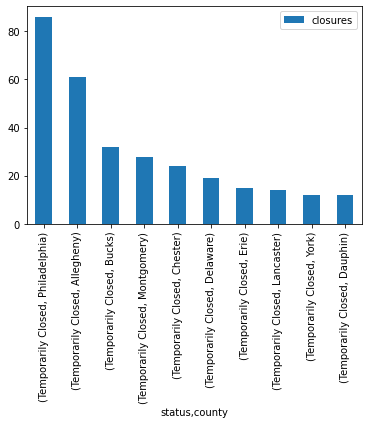

In [70]:
plot_top_counties()

### Are childcare centers with lower Keystone STAR ratings more likely to be temporarily closed right now?

According to pakeys.org:
>Keystone STARS is Pennsylvania’s Quality Rating and Improvement System (QRIS). A QRIS is a continuous quality improvement systemic approach to assess, improve, and communicate the level of quality in early and school-age care and education programs. Keystone STARS is a program of Pennsylvania’s Office of Child Development and Early Learning (OCDEL).

All childcare centers that have obtained a basic certification of compliance from the PA Department of Human Services are automatically given a STAR rating of 1, and they can then pursue a higher STAR rating through working with a quality coach on a continuous quality improvement and assessment plan. The highest possible STAR rating is 4. Most childcare centers in the dataset I analyzed for this project have at least a STAR rating of 1. 

While centers with no STAR rating may not be compliant with DHS standards, it would not be quite accurate to assume that they have a rating of 0 since they haven’t been assessed at all yet. 

Similarly, childcare centers with ratings of 1 may not necessarily be the ‘bad’ ones, but [based on the updated information available through OCDEL](https://secureservercdn.net/198.71.233.197/69d.231.myftpupload.com/wp-content/uploads/2020/07/Keystone-STARS-Program-Manual-8.1.2020-FINAL.pdf) about [how the Keystone STARS program works](https://secureservercdn.net/198.71.233.197/69d.231.myftpupload.com/wp-content/uploads/2020/07/2020-Keystone-STARS-Performance-Standards-8.1.2020.pdf), it may be the case that those with ratings of 1 are newer programs and/or have fewer resources than those with ratings of 3 or 4. 

To compare the Keystone STAR ratings of open versus temporarily closed childcare centers statewide, I first had to create a copy of the original dataframe, in which I removed all childcare centers with no STAR rating and converted the string data in the STAR column to intergers (e.g. I had to change entries of "STAR 1" to 1). 

In [71]:
def get_stars_df():
    """modifies the original dataframe by removing all rows for childcare centers 
    that have no STAR rating and then converting the string data in the Keystone
    STAR rating column to integers that can be analyzed"""
    former_df = get_df()
    # import the full childcare dataframe
    stars_df = former_df.loc[~former_df['stars'].str.contains("No")]
    # filter out all rows with childcare centers that have "No STARS level"
    
    # I learned through pandas tutorials that using the ~ character with the 
    # .loc function is a handy way to find and remove rows from a dataframe
    # based on given criteria. Functions like this one take the place of 
    # loops and if/else conditional statements throughout this program. 
    
    stars_df = stars_df.replace(to_replace={'stars': {'STAR 1': 1, 'STAR 2' : 2, 
    'STAR 3': 3, 'STAR 4': 4}}, value=None)
    # the dictionary above replaces string data in 'stars' column with 
    # corresponding integers that can be analyzed (i.e. changes an entry of 
    # 'STAR 1' to 1)
    return stars_df

Now, we have a modified dataframe that can be used to compare STAR ratings of open versus temporarily closed childcare centers in Pennsylvania, including only centers that have at least a STAR rating of 1. 

In [72]:
def compare_stars():
    df = get_stars_df()
    # import the dataframe created above
    
    open_centers = df[(df.status == 'Open')]
    closed_centers = df[(df.status == 'Temporarily Closed')]
    # subset the dataframe created in the previous function by operating status
    
    open_stars_mean = open_centers[('stars')].mean()
    open_stars_mean = "{:.3}".format(open_stars_mean)
    open_stars_stdev = open_centers[('stars')].std()
    open_stars_stdev = "{:.3}".format(open_stars_stdev)
    # use pandas functions to get the mean and standard deviation of the STAR
    # ratings of the PA childcare centers that remain open
    
    closed_stars_mean = closed_centers[('stars')].mean()
    closed_stars_mean = "{:.3}".format(closed_stars_mean)
    closed_stars_stdev = closed_centers[('stars')].std()
    closed_stars_stdev = "{:.3}".format(closed_stars_stdev)
    # get the mean and standard deviation of the STAR ratings of the PA 
    # childcare centers that remain open
    
    print("Among the temporarily closed childcare centers in PA, the mean Keystone STAR rating is", ' ', closed_stars_mean, "\n"
"with a standard deviation of", ' ', closed_stars_stdev, ".", sep='')
    print("")
    print("Among the open childcare centers in PA, the mean Keystone STAR rating is", ' ', open_stars_mean, ' ', 
"with a standard deviation of", ' ', open_stars_stdev, ".", sep="")

In [73]:
compare_stars()

Among the temporarily closed childcare centers in PA, the mean Keystone STAR rating is 1.77
with a standard deviation of 1.1.

Among the open childcare centers in PA, the mean Keystone STAR rating is 1.9 with a standard deviation of 1.16.


The mean Keystone STAR rating of the childcare centers that are currently open is slightly higher than the mean rating of those that are temporarily closed. The standard deviation for open childcare centers is very slightly higher, indicating that the values are more spread out than they are among the closed childcare centers, but that is likely just because there are far more values in one group versus the other (there are 412 temporarily closed childcare centers right now versus thousands that remain open).  

In [74]:
def compare_stars_plot():
     """use matplotlib to create a histogram with data from the stars_df to 
     compare childcare center closure rates by Keystone STAR rating"""
     df = get_stars_df()
     # bring in the modified dataframe that only contains the childcare centers
     # with Keystone STAR ratings and assign it to a local variable
        
     x_closed = df.stars[(df.status == 'Temporarily Closed')]
     x_open = df.stars[(df.status == 'Open')]
     # since we want to plot two histograms on a single chart, two different 
     # x-axes get assigned here: one for all childcare centers in the 
     # stars_df that are temporarily closed and one for those that are open
     
     plt.hist(x_closed, 4, alpha=0.5, label='temporarily closed centers')
     plt.hist(x_open, 4, alpha=0.5, label='open centers')
     plt.xlabel('STAR Rating', size=14)
     plt.ylabel('Count', size=14)
     plt.title('PA Childcare Centers - Current Operating Status by STAR Rating')
     plt.legend(loc='upper right')
     # call matplotlib as plt to create overlapping histogram using the aplha
     # function

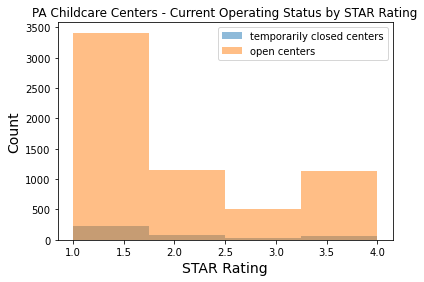

In [75]:
compare_stars_plot()

The overlapping histogram above visualizes the number of childcare center closures by Keystone STAR rating (1-4). The darker bars represent the centers that are temporarily closed right now, and the lighter bars represent those that are open. 

At a glance, the number of closures by STAR rating appear to be proportionate to the overall percentage of PA childcare centers that possess each rating. 

Based on what this analysis has revealed, it is probably _not_ the case that childcare centers with lower Keystone STAR ratings are more likely to be temporarily closed than those with higher ratings. It appears that a majority of all childcare centers in the state, regardless of current operating status, have a Keystone STAR rating of 1. 